# Pixel classification or image segmentation
![pandas](https://images.unsplash.com/photo-1649073586428-e288125d930a?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1332&q=80)


photo by [julien Tromeur](https://unsplash.com/@julientromeur) at [Unsplash](https://unsplash.com/)


## Introduction

this is the companion colab code for my tutorial in medium about introduction to medical images in Python , please read the article for better understanding of the code.  
this is a colab notebook, you can test in colab (all the code has been tested and you do not need to set your machine)

[article](https://)



note: the articles will be publish soon

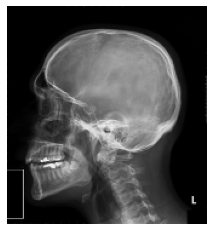

In [ ]:
#loading image from url
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.transform import rescale
from skimage import  color
import scipy.ndimage as ndi
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Lat_lebka.jpg/330px-Lat_lebka.jpg"
#url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/AP_lumbar_xray.jpg/255px-AP_lumbar_xray.jpg"
a = io.imread(url)

im = color.rgb2gray(a)
#rescaling
a = image_rescaled = rescale(im, 0.5, anti_aliasing=False)
plt.imshow(a, cmap = "gray")
plt.axis('off')
plt.show()





In [ ]:
from skimage import exposure
from scipy import ndimage
url = "https://upload.wikimedia.org/wikipedia/commons/7/75/MeihuaShan_1.jpg"
im = io.imread(url)
img = color.rgb2gray(im)
p2, p98 = np.percentile(img, (2, 98))
img = exposure.rescale_intensity(img, in_range=(p2, p98))
threshold =[0.24, 0.55,0.85]
threshold

[0.24, 0.55, 0.85]

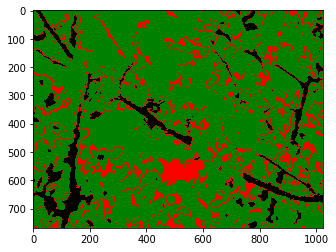

In [ ]:
img =np.where(img <=threshold[0], 0, img )
img =np.where((img >threshold[0]) & (img <=threshold[1]), 1, img )
img =np.where(img >=threshold[2], 1, img )
plt.imshow(img, cmap= matplotlib.colors.ListedColormap(['black', 'red', "green"]))

(-0.5, 1023.5, 767.5, -0.5)

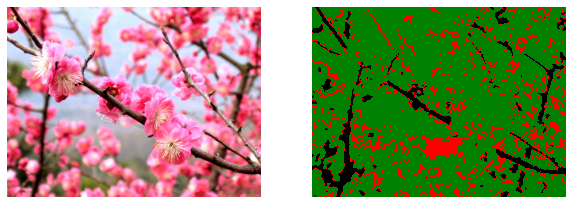

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.imshow(im)
plt.axis('off')
plt.subplot(122)
plt.imshow(img, cmap= matplotlib.colors.ListedColormap(['black', 'red', "green"]))
plt.axis('off')

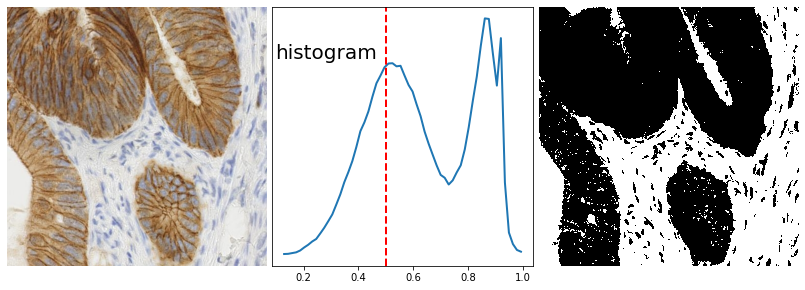

In [ ]:
# Gaussian Mixture Model
from skimage import data
from sklearn.mixture import GaussianMixture
im = data.immunohistochemistry()
img = color.rgb2gray(im)
hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

#training the Gaussian mixture model
classif = GaussianMixture(n_components=2)
classif.fit(img.reshape((img.size, 1)))

threshold = np.mean(classif.means_)
binary_img = img > threshold


plt.figure(figsize=(11,4))

plt.subplot(131)
plt.imshow(im)
plt.axis('off')
plt.subplot(132)
plt.plot(bin_centers, hist, lw=2)
plt.axvline(0.5, color='r', ls='--', lw=2)
plt.text(0.01, 0.8, 'histogram', fontsize=20, transform = plt.gca().transAxes)
plt.yticks([])
plt.subplot(133)
plt.imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


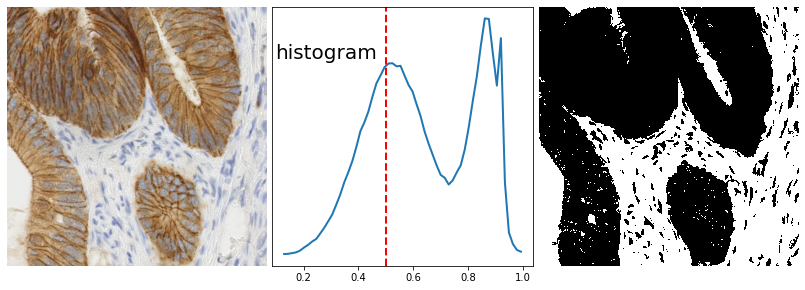

In [ ]:
# Bayesian classification
from sklearn.naive_bayes import GaussianNB
from skimage import data
im = data.immunohistochemistry()
img = color.rgb2gray(im)
hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])


X = img.reshape((img.size, 1))
y = binary_img.reshape((binary_img.size, 1))

gnb = GaussianNB()
y_pred = gnb.fit(X, y ).predict(X)
y_pred = y_pred.reshape((binary_img.shape[0], binary_img.shape[1]))

plt.figure(figsize=(11,4))

plt.subplot(131)
plt.imshow(im)
plt.axis('off')
plt.subplot(132)
plt.plot(bin_centers, hist, lw=2)
plt.axvline(0.5, color='r', ls='--', lw=2)
plt.text(0.01, 0.8, 'histogram', fontsize=20, transform = plt.gca().transAxes)
plt.yticks([])
plt.subplot(133)
plt.imshow(y_pred, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)
plt.show()